<a href="https://www.kaggle.com/code/erayyglr/diabetes-dataset-analysis?scriptVersionId=209760412" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Information about Dataset

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
def check_df(dataframe, head=5):
    print("**********SHAPE*************")
    print(dataframe.shape)
    print("**********TYPE**************")
    print(dataframe.dtypes)
    print("**********HEAD**************")
    print(dataframe.head(head))
    print("**********TAIL***************")
    print(dataframe.tail(head))
    print("**********NA*****************")
    print(dataframe.isnull().sum())
    print("**********QUANTILES***************")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

**********SHAPE*************
(768, 9)
**********TYPE**************
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
**********HEAD**************
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Gives the names of categorical, numerical, and categorical but cardinal variables in the dataset.

    Args:
        dataframe: dataframe
            The dataframe from which variable names are to be taken.
        cat_th: int, float
            Class threshold value for variables that are numerical but categorical.
        car_th: int, float
            Class threshold value for variables that are categorical but cardinal.

    Returns:
        cat_cols: list
            List of categorical variables.
        num_cols: list
            List of numerical variables.
        cat_but_car: list
            List of cardinal-looking categorical variables.

    Notes:
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is included in cat_cols.
    """

    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["object", "category", "bool"]]
    num_but_cat = [col for col in df.columns if str(df[col].dtypes) in ["int64", "float64"] and df[col].nunique() < 10]
    cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"] and col not in cat_cols]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car    

In [7]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [8]:
print(f"Cat_cols: {cat_cols}\n Num_cols: {num_cols}\n Cat_but_car: {cat_but_car}")

Cat_cols: ['Outcome']
 Num_cols: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
 Cat_but_car: []


In [9]:
def target_summary(dataframe,target, col_names):
    print(dataframe.groupby(target).agg({col_names: "mean"}), "\n")

for col in num_cols:
    target_summary(df, "Outcome", col)

         Pregnancies
Outcome             
0           3.298000
1           4.865672 

            Glucose
Outcome            
0        109.980000
1        141.257463 

         BloodPressure
Outcome               
0            68.184000
1            70.824627 

         SkinThickness
Outcome               
0            19.664000
1            22.164179 

            Insulin
Outcome            
0         68.792000
1        100.335821 

               BMI
Outcome           
0        30.304200
1        35.142537 

         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500 

               Age
Outcome           
0        31.190000
1        37.067164 



## Handling Outliers

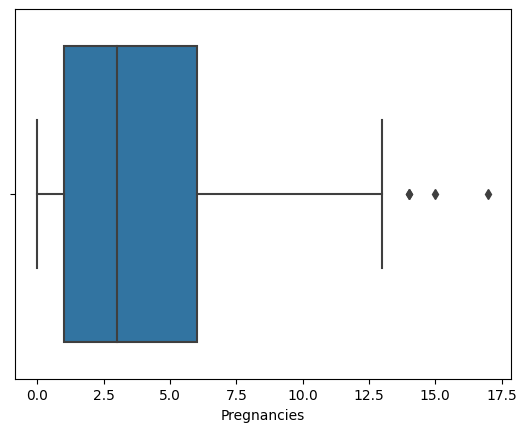

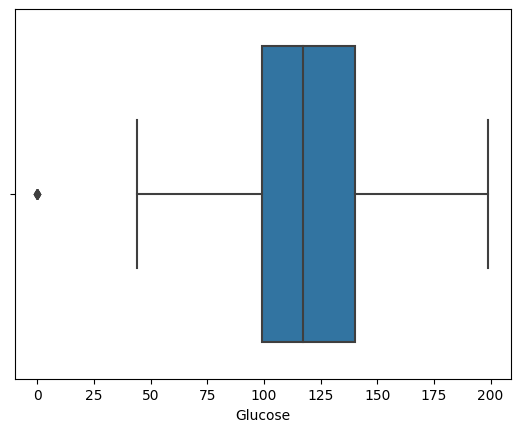

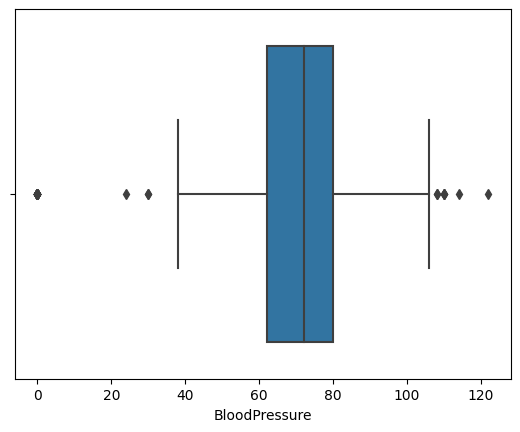

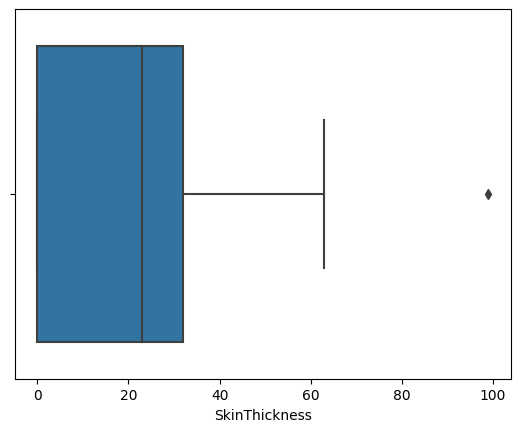

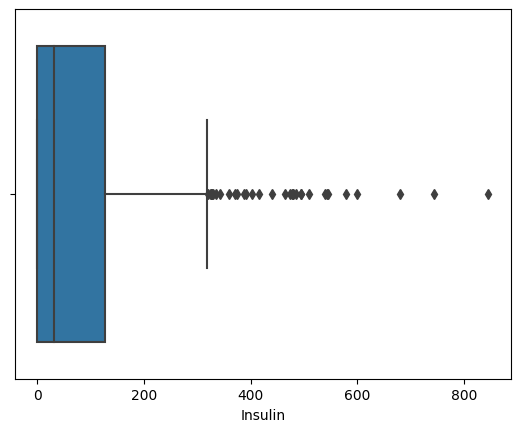

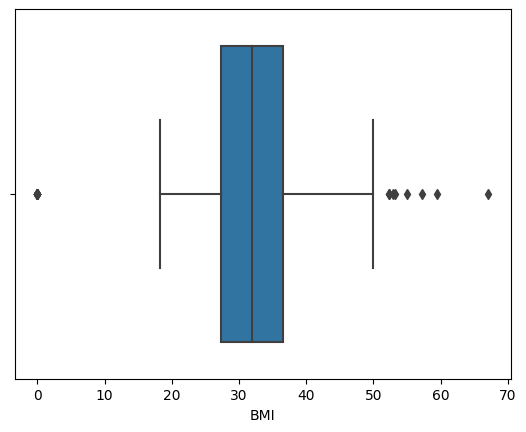

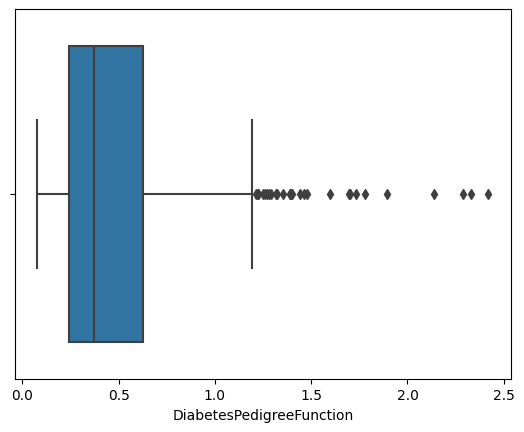

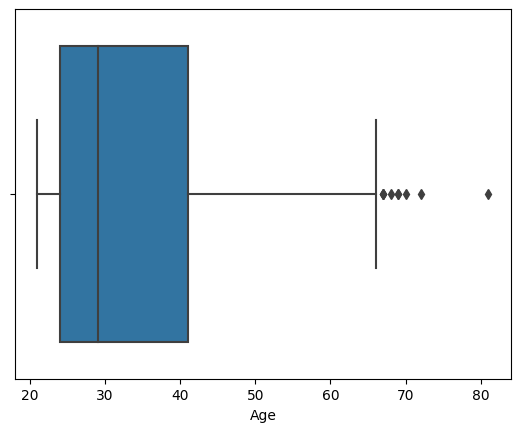

In [10]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.show()

In [11]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [12]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    return dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None)

In [13]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [14]:
def replace_with_threshold(dataframe, variable):
    """
        If the data is lower than the low limit, update with the low limit
        If the data is bigger than the up limit, update with the up limit
    """
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [15]:
for col in num_cols:
    replace_with_threshold(df, col)

In [16]:
for col in num_cols:  # Checking again if there are still outlier
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


## Handling NaN (0) Values

In [17]:
cols = [col for col in num_cols if col != "Pregnancies"]
for col in cols:
    df[col].replace(0, np.nan, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35.0,NaN,33.6,0.627,50.0,1
1,1.0,85.0,66,29.0,NaN,26.6,0.351,31.0,0
2,8.0,183.0,64,NaN,NaN,23.3,0.672,32.0,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70,27.0,NaN,36.8,0.340,27.0,0
765,5.0,121.0,72,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60,NaN,NaN,30.1,0.349,47.0,1


In [18]:
df.isnull().sum()  # Checking NA's

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [19]:
nan_percentage = df.isna().mean() * 100  # Na percentages
nan_percentage

Pregnancies                  0.000000
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness               29.557292
Insulin                     48.697917
BMI                          0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [20]:
df_filled = df.apply(lambda x: x.fillna(x.median()), axis=0)  # Filling NA's with median
df_filled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35.0,125.0,33.6,0.627,50.0,1
1,1.0,85.0,66,29.0,125.0,26.6,0.351,31.0,0
2,8.0,183.0,64,29.0,125.0,23.3,0.672,32.0,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70,27.0,125.0,36.8,0.340,27.0,0
765,5.0,121.0,72,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60,29.0,125.0,30.1,0.349,47.0,1


In [21]:
df_filled.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Standardization

In [22]:
scaler = StandardScaler()
df_filled[num_cols] = scaler.fit_transform(df_filled[num_cols])
df_filled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647150,0.861926,0.092691,0.686889,-0.156977,0.209359,0.588927,1.445691,1
1,-0.848970,-1.159433,-0.330201,-0.009674,-0.156977,-0.784254,-0.378101,-0.189304,0
2,1.245598,1.984903,-0.471166,-0.009674,-0.156977,-1.252672,0.746595,-0.103252,1
3,-0.848970,-1.031093,-0.330201,-0.706238,-0.667869,-0.571337,-1.022787,-1.049828,0
4,-1.148194,0.508990,-2.162737,0.686889,0.551680,1.557835,2.596563,-0.017199,1
...,...,...,...,...,...,...,...,...,...
763,1.844045,-0.646072,0.374620,2.196109,0.749444,0.109998,-1.008772,2.564372,0
764,-0.549746,0.027714,-0.048273,-0.241862,-0.156977,0.663583,-0.416642,-0.533513,0
765,0.347926,-0.004371,0.092691,-0.706238,-0.371222,-0.841032,-0.749497,-0.275356,0
766,-0.848970,0.156054,-0.753094,-0.009674,-0.156977,-0.287447,-0.385109,1.187534,1


## Correlation Analysis

In [23]:
corr_matrix = df_filled.corr()

<Axes: >

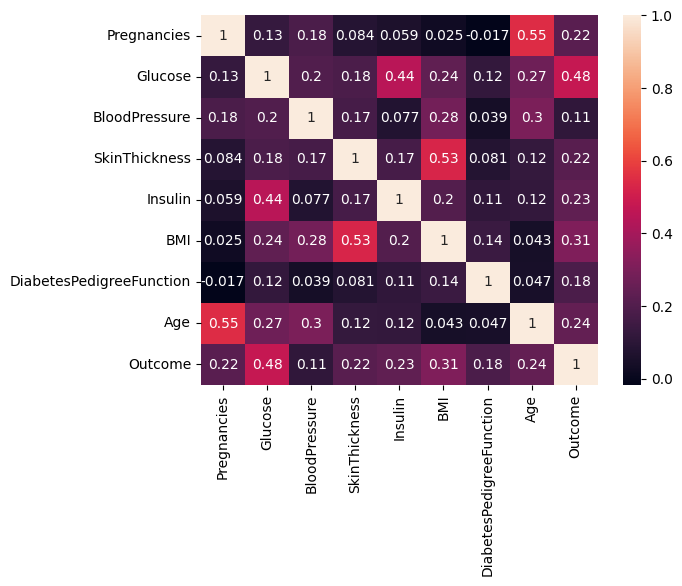

In [24]:
sns.heatmap(corr_matrix, annot=True)

## Modelling

In [25]:
y = df_filled["Outcome"]
X = df_filled.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [26]:
reg_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [27]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred, y_test), 3)}")
print(f"Precision: {round(precision_score(y_pred, y_test), 2)}")
print(f"F1: {round(f1_score(y_pred, y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred, y_test), 2)}")  

Accuracy: 0.78
Recall: 0.725
Precision: 0.62
F1: 0.67
Auc: 0.77


In [28]:
reg_model.score(X_test, y_test)

0.7835497835497836

In [29]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    print(feature_imp.sort_values("Value", ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    
    plt.title("Features")
    plt.tight_layout()
    plt.show()

      Value                   Feature
1  0.252316                   Glucose
5  0.150245                       BMI
7  0.131167                       Age
6  0.129297  DiabetesPedigreeFunction
0  0.092630               Pregnancies
2  0.087409             BloodPressure
4  0.086310                   Insulin
3  0.070627             SkinThickness


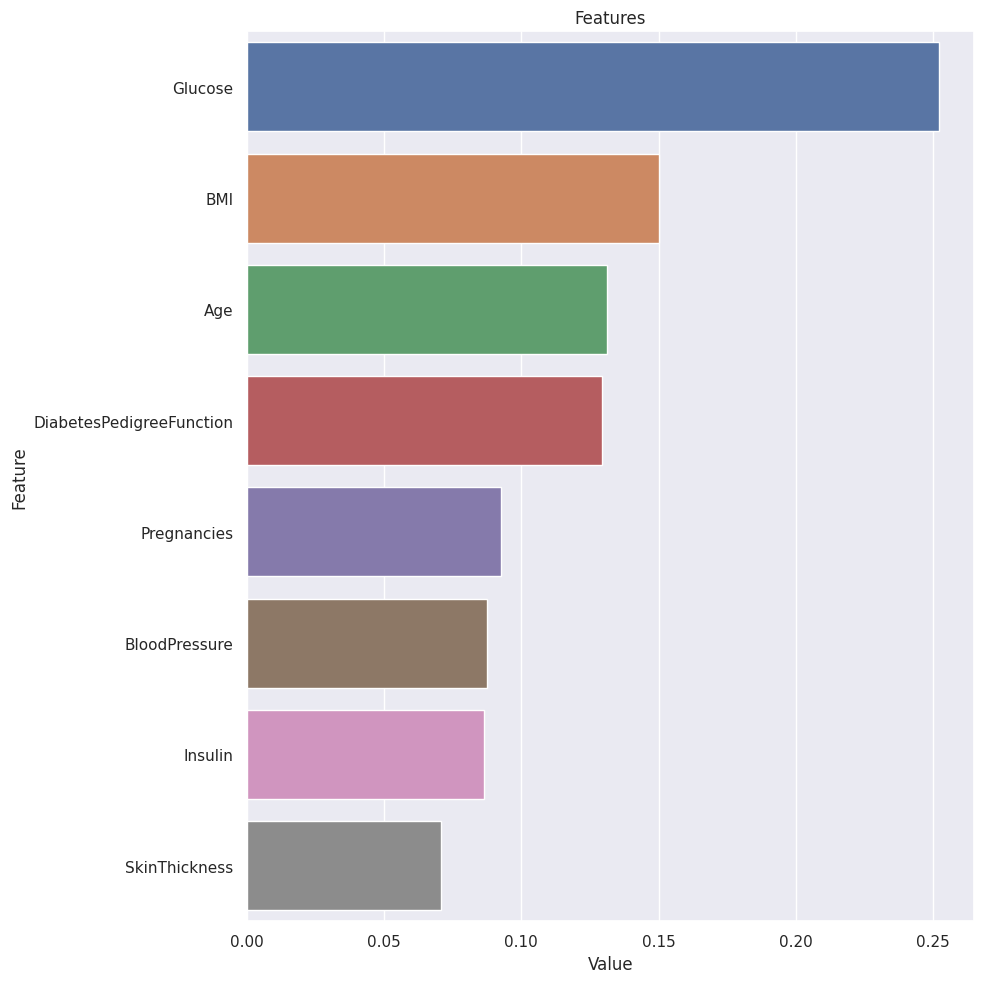

In [30]:
plot_importance(reg_model, X)